<a href="https://colab.research.google.com/github/luisdiaz1997/BioinformaticsExamples/blob/master/BIOE_300_HM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

### Problem 1b

In [ ]:
def basal(p):
  return p/(1+p)

In [ ]:
def bound(p, v):
  return (v*p)/(1+ (v*p))

In [ ]:
def fold(p, v):
  return bound(p, v)/basal(p)

In [ ]:
def fold2(p_basal, f_reg, g=1):
  return f_reg/(1+(f_reg*g*p_basal))

Text(0.5, 1.0, 'Fold without approximation')

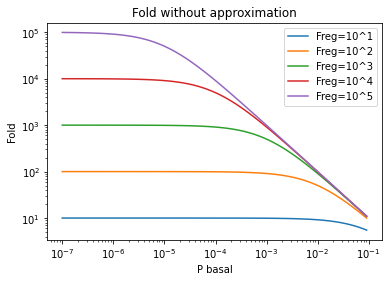

In [ ]:
p = 10**np.linspace(-7, -1, 100)
for i in range(1, 6):
  v = 10**i
  plt.plot(basal(p), fold(p, v), label='Freg=10^'+str(i))

plt.ylabel('Fold')
plt.xlabel('P basal')
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.title('Fold without approximation')

Text(0.5, 1.0, 'Fold with approximation')

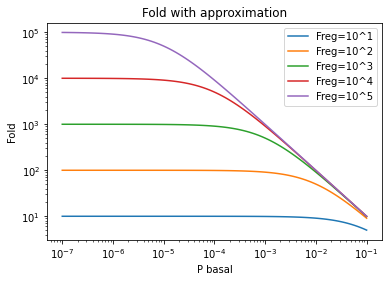

In [ ]:
p = 10**np.linspace(-7, -1, 100)

for i in range(1, 6):
  v = 10**i
  plt.plot(p, fold2(p, v), label='Freg=10^'+str(i))

plt.ylabel('Fold')
plt.xlabel('P basal')
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.title('Fold with approximation')

## Question 1C

In [ ]:
x = np.array([-7.76, -5.84, -5.8, -5.74, -4.89, -3.72, -3.52, -2])
x = 10**x
y = np.array([4.31, 4.26, 3.66, 2.42, 1.96, 2.56, 2.09, 0.88])
y = 10**y

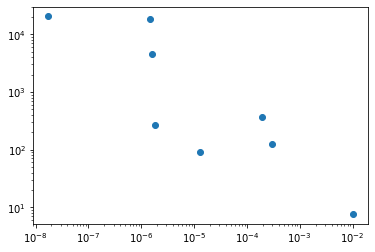

In [ ]:
plt.scatter(x, y)
plt.yscale("log")
plt.xscale("log")

In [ ]:
popt, pcov = curve_fit(fold2, x, y)
print('F_reg :', popt[0])
print('P scale factor g:', popt[1])

F_reg : 21111.285777865407
P scale factor g: 51.138018602003434


In [ ]:
p = 10**np.linspace(-8, -1, 100)
y_pred = fold2(p, *popt)

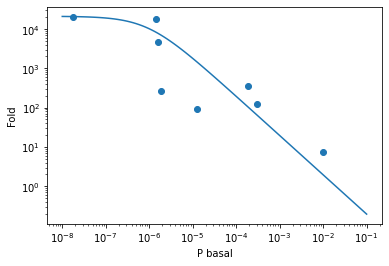

In [ ]:
plt.plot(p, y_pred)
plt.scatter(x, y)
plt.ylabel('Fold')
plt.xlabel('P basal')
plt.yscale("log")
plt.xscale("log")

Problem 2a

### Not taking into account palendromic sequences, the code below calculates the possible number of Kmers per K

In [1]:
letters = ['A', 'G', 'C', 'T']
def get_counts(k=2):
  kmer_dict = {}
  count = 0
  for i in range(4**k):
    kmer = ''.join([letters[(i//(4**j))%4] for j in range(k)])
    if (kmer_dict.get(kmer, 0) + kmer_dict.get(kmer[::-1], 0)) > 0: ##check if palendromic found
      continue
    else:
      kmer_dict[kmer] = 1
      count+=1
  return count

In [8]:
for i in [3, 4, 5]:
  print('For K='+str(i)+' there are', get_counts(i), 'possible kmers')

For K=3 there are 40 possible kmers
For K=4 there are 136 possible kmers
For K=5 there are 544 possible kmers
